Coeficientes: -0.004406395182833581 0.00419153860101933 -1.1006918875837689e-05


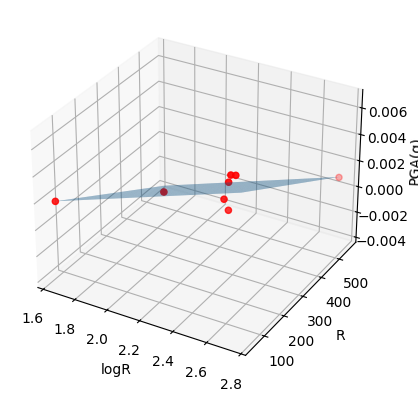

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos
y = np.array([9.2955e-04, 0.0012, 0.0020, 0.0021, 0.0032, 0.0033, 0.0037, 0.0038])
x1 = np.array([2.7463, 2.4176, 1.6461, 2.4020, 2.1715, 2.4176, 2.4419, 2.4250])
x2 = np.array([557.6300, 261.5500, 44.2700, 252.3200, 148.4200, 261.5500, 276.6000, 266.0800])

# Calculo de sumatorias
n = len(x1)
sumx1 = np.sum(x1)
sumx2 = np.sum(x2)
sumy = np.sum(y)
ym = np.mean(y)

x1y = x1 * y
sumx1y = np.sum(x1y)
Sx1y = sumx1y - sumx1 * sumy / n

x2y = x2 * y
sumx2y = np.sum(x2y)
Sx2y = sumx2y - sumx2 * sumy / n

x1x2 = x1 * x2
sumx1x2 = np.sum(x1x2)
Sx1x2 = sumx1x2 - sumx1 * sumx2 / n

x1_2 = x1 ** 2
sumx1_2 = np.sum(x1_2)
Sx1_2 = sumx1_2 - sumx1 ** 2 / n

x2_2 = x2 ** 2
sumx2_2 = np.sum(x2_2)
Sx2_2 = sumx2_2 - sumx2 ** 2 / n

b1 = (Sx1y * Sx2_2 - Sx2y * Sx1x2) / (Sx1_2 * Sx2_2 - Sx1x2 ** 2)
b2 = (Sx2y * Sx1_2 - Sx1y * Sx1x2) / (Sx1_2 * Sx2_2 - Sx1x2 ** 2)
a = (sumy - b1 * sumx1 - b2 * sumx2) / n

print("Coeficientes:", a, b1, b2)

# Predicciones
yp = a + b1 * x1 + b2 * x2

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='r', marker='o')

# Definir el rango para x1 y x2
x1_range = np.linspace(min(x1), max(x1), 100)
x2_range = np.linspace(min(x2), max(x2), 100)

X1FIT, X2FIT = np.meshgrid(x1_range, x2_range)
YFIT = a + b1 * X1FIT + b2 * X2FIT

ax.plot_surface(X1FIT, X2FIT, YFIT, alpha=0.5)
ax.set_xlabel('logR')
ax.set_ylabel('R')
ax.set_zlabel('PGA(g)')
plt.show()
